In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv


# Import Library 

In [41]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import 7+ different models (REQUIRED)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 70)
print(" " * 15 + "HOUSE PRICE PREDICTION ASSIGNMENT")
print("=" * 70)

# List all input files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


               HOUSE PRICE PREDICTION ASSIGNMENT
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv


# Load Data

In [42]:



print("\n" + "=" * 70)
print("STEP 1: DATA LOADING")
print("=" * 70)

# Load datasets
train_df = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv')
test_df = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv')

print(f"Training Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")
print(f"Sample Submission Shape: {sample_submission.shape}")

print("\n" + "=" * 70)
print("FIRST FEW ROWS OF TRAINING DATA")
print("=" * 70)
print(train_df.head(10))

print("\n" + "=" * 70)
print("DATASET STRUCTURE")
print("=" * 70)
train_df.info()



STEP 1: DATA LOADING
Training Data Shape: (10000, 9)
Test Data Shape: (3320, 8)
Sample Submission Shape: (3320, 2)

FIRST FEW ROWS OF TRAINING DATA
   id area_type   availability                 location       size  \
0   0    type_I  Ready To Move  Banashankari 2 nd Stage      3 BHK   
1   1    type_I  Ready To Move                 Balagere      2 BHK   
2   2    type_I         17-Oct     Banashankari Stage V      3 BHK   
3   3    type_I  Ready To Move           Thigalarapalya      3 BHK   
4   4  type_III  Ready To Move                    arudi  3 Bedroom   
5   5    type_I  Ready To Move                 Kadugodi      3 BHK   
6   6    type_I  Ready To Move                Yelahanka      2 BHK   
7   7    type_I  Ready To Move              Koramangala      2 BHK   
8   8    type_I  Ready To Move       7th Phase JP Nagar      2 BHK   
9   9    type_I  Ready To Move             Kasavanhalli      2 BHK   

   total_sqft  bath  balcony   price  
0      1030.0   2.0      2.0   77.25  
1 

# IDENTIFY DATA TYPES


In [43]:


# Create comprehensive data type summary
dtype_summary = pd.DataFrame({
    'Column_Name': train_df.columns,
    'Data_Type': train_df.dtypes.values,
    'Non_Null_Count': train_df.count().values,
    'Null_Count': train_df.isnull().sum().values,
    'Unique_Values': [train_df[col].nunique() for col in train_df.columns]
})

print(dtype_summary.to_string(index=False))

# Categorize columns by type
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove 'id' and 'price' from feature lists
if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'price' in numerical_cols:
    numerical_cols.remove('price')

print("\n" + "=" * 70)
print("COLUMN CATEGORIZATION")
print("=" * 70)
print(f"\n NUMERICAL FEATURES ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   - {col}: {train_df[col].dtype}")

print(f"\n CATEGORICAL FEATURES ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   - {col}: {train_df[col].dtype} ({train_df[col].nunique()} unique values)")

print(f"\n🎯 TARGET VARIABLE: price (float64)")

print("\n RUBRIC REQUIREMENT 1 COMPLETED: Data types explicitly identified")


 Column_Name Data_Type  Non_Null_Count  Null_Count  Unique_Values
          id     int64           10000           0          10000
   area_type    object           10000           0              4
availability    object           10000           0             76
    location    object            9999           1           1185
        size    object            9987          13             27
  total_sqft   float64            9967          33           1800
        bath   float64            9936          64             16
     balcony   float64            9525         475              4
       price   float64           10000           0           1695

COLUMN CATEGORIZATION

 NUMERICAL FEATURES (3):
   - total_sqft: float64
   - bath: float64
   - balcony: float64

 CATEGORICAL FEATURES (4):
   - area_type: object (4 unique values)
   - availability: object (76 unique values)
   - location: object (1185 unique values)
   - size: object (27 unique values)

🎯 TARGET VARIABLE: price (floa

#  DESCRIPTIVE STATISTICS 


In [44]:


# Calculate comprehensive statistics
print("\n NUMERICAL COLUMNS STATISTICS:")
print("-" * 70)

stats_data = []
for col in numerical_cols + ['price']:
    stats_data.append({
        'Column': col,
        'Count': train_df[col].count(),
        'Min': train_df[col].min(),
        'Max': train_df[col].max(),
        'Mean': train_df[col].mean(),
        'Median': train_df[col].median(),
        'Std_Dev': train_df[col].std(),
        'Q1 (25%)': train_df[col].quantile(0.25),
        'Q3 (75%)': train_df[col].quantile(0.75)
    })

stats_df = pd.DataFrame(stats_data)
print(stats_df.to_string(index=False))

print("\n CATEGORICAL COLUMNS STATISTICS:")
print("-" * 70)
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"   Unique values: {train_df[col].nunique()}")
    print(f"   Most frequent: {train_df[col].mode()[0]} (appears {train_df[col].value_counts().iloc[0]} times)")
    print(f"   Top 5 values:\n{train_df[col].value_counts().head()}")

print("\n RUBRIC REQUIREMENT 2 COMPLETED: Min, Max, Mean, Median presented")



 NUMERICAL COLUMNS STATISTICS:
----------------------------------------------------------------------
    Column  Count  Min     Max        Mean  Median     Std_Dev  Q1 (25%)  Q3 (75%)
total_sqft   9967  1.0 52272.0 1570.095822  1279.0 1302.566836    1100.0    1682.5
      bath   9936  1.0    18.0    2.692029     2.0    1.274172       2.0       3.0
   balcony   9525  0.0     3.0    1.585302     2.0    0.814347       1.0       2.0
     price  10000  8.0  3600.0  113.275879    72.0  151.802643      50.0     120.0

 CATEGORICAL COLUMNS STATISTICS:
----------------------------------------------------------------------

area_type:
   Unique values: 4
   Most frequent: type_I (appears 6589 times)
   Top 5 values:
area_type
type_I      6589
type_II     1832
type_III    1515
type_IV       64
Name: count, dtype: int64

availability:
   Unique values: 76
   Most frequent: Ready To Move (appears 7944 times)
   Top 5 values:
availability
Ready To Move    7944
18-Dec            243
18-May         

# Handling Missing Value

In [45]:


missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df)) * 100

missing_df_train = pd.DataFrame({
    'Column': missing_train.index,
    'Missing_Count': missing_train.values,
    'Missing_Percentage': missing_train_pct.values,
    'Data_Type': train_df.dtypes.values
})
missing_df_train = missing_df_train[missing_df_train['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df_train) > 0:
    print(missing_df_train.to_string(index=False))
else:
    print("✓ No missing values found in training data!")

# Test data missing values
print("\n MISSING VALUES IN TEST DATA:")
print("-" * 70)

missing_test = test_df.isnull().sum()
missing_test_pct = (missing_test / len(test_df)) * 100

missing_df_test = pd.DataFrame({
    'Column': missing_test.index,
    'Missing_Count': missing_test.values,
    'Missing_Percentage': missing_test_pct.values
})
missing_df_test = missing_df_test[missing_df_test['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df_test) > 0:
    print(missing_df_test.to_string(index=False))
else:
    print("✓ No missing values found in test data!")



    Column  Missing_Count  Missing_Percentage Data_Type
   balcony            475                4.75   float64
      bath             64                0.64   float64
total_sqft             33                0.33   float64
      size             13                0.13    object
  location              1                0.01    object

 MISSING VALUES IN TEST DATA:
----------------------------------------------------------------------
    Column  Missing_Count  Missing_Percentage
   balcony            134            4.036145
total_sqft             13            0.391566
      bath              9            0.271084
      size              3            0.090361


# Handling Duplicate

In [46]:


duplicates_train = train_df.duplicated().sum()
total_train = len(train_df)
dup_pct_train = (duplicates_train / total_train) * 100

print(f"Total rows: {total_train}")
print(f"Duplicate rows: {duplicates_train}")
print(f"Percentage: {dup_pct_train:.2f}%")

if duplicates_train > 0:
    print(f"\n  ACTION TAKEN: Dropping {duplicates_train} duplicate rows from training data")
    train_df_original_shape = train_df.shape
    train_df = train_df.drop_duplicates()
    print(f"   Original shape: {train_df_original_shape}")
    print(f"   New shape: {train_df.shape}")
    print(f"   Rows removed: {train_df_original_shape[0] - train_df.shape[0]}")
else:
    print("✓ No duplicate rows found in training data!")

# Check duplicates in test data
print("\n📊 TEST DATA DUPLICATES:")
print("-" * 70)

duplicates_test = test_df.duplicated().sum()
total_test = len(test_df)
dup_pct_test = (duplicates_test / total_test) * 100

print(f"Total rows: {total_test}")
print(f"Duplicate rows: {duplicates_test}")
print(f"Percentage: {dup_pct_test:.2f}%")

if duplicates_test > 0:
    print(f"\n  NOTE: Test data has {duplicates_test} duplicates")
    print("   → Preserving test duplicates for submission integrity")
    print("   → All test rows must be present in final submission")
else:
    print("✓ No duplicate rows found in test data!")


Total rows: 10000
Duplicate rows: 0
Percentage: 0.00%
✓ No duplicate rows found in training data!

📊 TEST DATA DUPLICATES:
----------------------------------------------------------------------
Total rows: 3320
Duplicate rows: 0
Percentage: 0.00%
✓ No duplicate rows found in test data!


# Handling Outlier

In [47]:


def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outlier_details = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_lower = df[df[col] < lower_bound]
        outliers_upper = df[df[col] > upper_bound]
        total_outliers = len(outliers_lower) + len(outliers_upper)
        
        outlier_details[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outliers_Below': len(outliers_lower),
            'Outliers_Above': len(outliers_upper),
            'Total_Outliers': total_outliers,
            'Outlier_Percentage': (total_outliers / len(df)) * 100
        }
    
    return outlier_details

# Detect outliers in all numerical columns including price
outlier_cols = numerical_cols + ['price']
outliers_info = detect_outliers_iqr(train_df, outlier_cols)

print(" OUTLIER DETECTION RESULTS (IQR Method):")
print("-" * 70)
print(f"{'Column':<15} {'Q1':<10} {'Q3':<10} {'IQR':<10} {'Lower':<10} {'Upper':<10} {'Outliers':<12} {'%':<8}")
print("-" * 70)

for col, info in outliers_info.items():
    print(f"{col:<15} {info['Q1']:<10.2f} {info['Q3']:<10.2f} {info['IQR']:<10.2f} "
          f"{info['Lower_Bound']:<10.2f} {info['Upper_Bound']:<10.2f} "
          f"{info['Total_Outliers']:<12} {info['Outlier_Percentage']:<8.2f}")






 OUTLIER DETECTION RESULTS (IQR Method):
----------------------------------------------------------------------
Column          Q1         Q3         IQR        Lower      Upper      Outliers     %       
----------------------------------------------------------------------
total_sqft      1100.00    1682.50    582.50     226.25     2556.25    899          8.99    
bath            2.00       3.00       1.00       0.50       4.50       781          7.81    
balcony         1.00       2.00       1.00       -0.50      3.50       0            0.00    
price           50.00      120.00     70.00      -55.00     225.00     966          9.66    


# 

# VISUALIZATION 1: Price Distribution Analysis


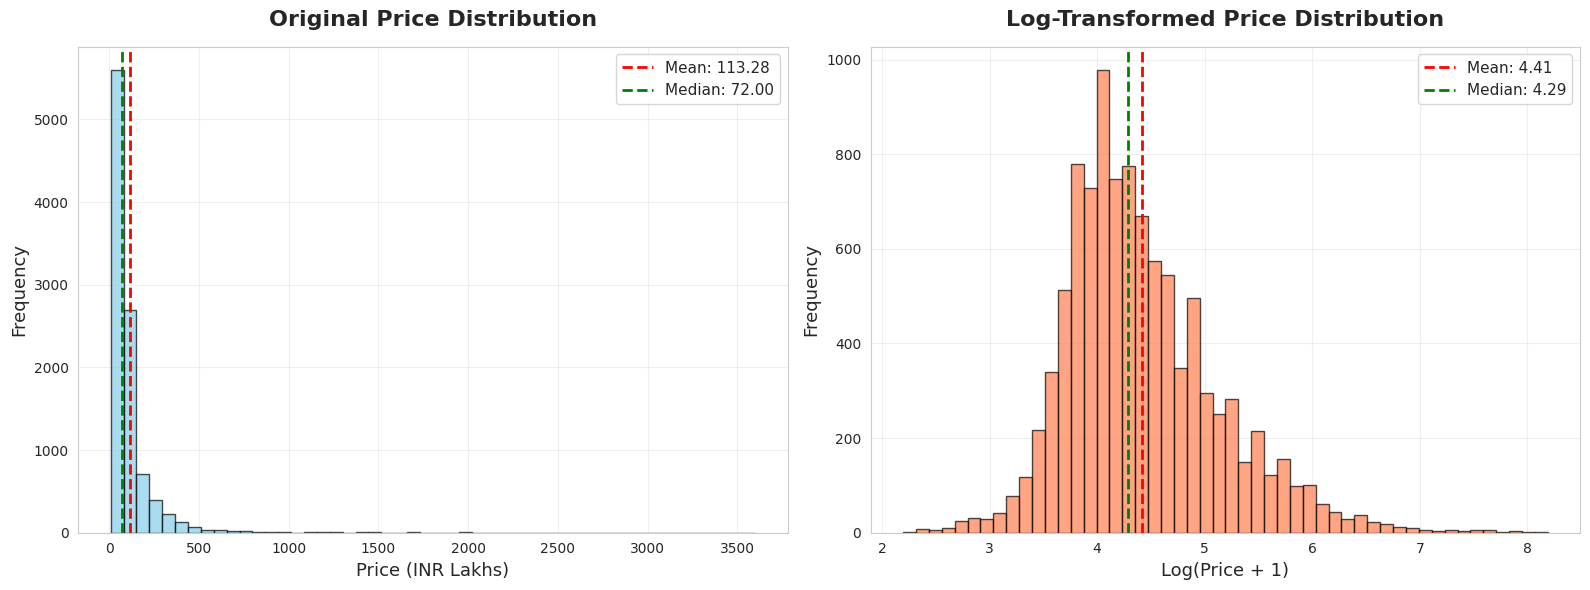

In [48]:


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original price distribution
axes[0].hist(train_df['price'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {train_df["price"].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {train_df["price"].median():.2f}')
axes[0].set_title('Original Price Distribution', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Price (INR Lakhs)', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Log-transformed price distribution
log_price = np.log1p(train_df['price'])
axes[1].hist(log_price, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(log_price.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {log_price.mean():.2f}')
axes[1].axvline(log_price.median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {log_price.median():.2f}')
axes[1].set_title('Log-Transformed Price Distribution', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Log(Price + 1)', fontsize=13)
axes[1].set_ylabel('Frequency', fontsize=13)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# VISUALIZATION 2: Correlation Heatmap


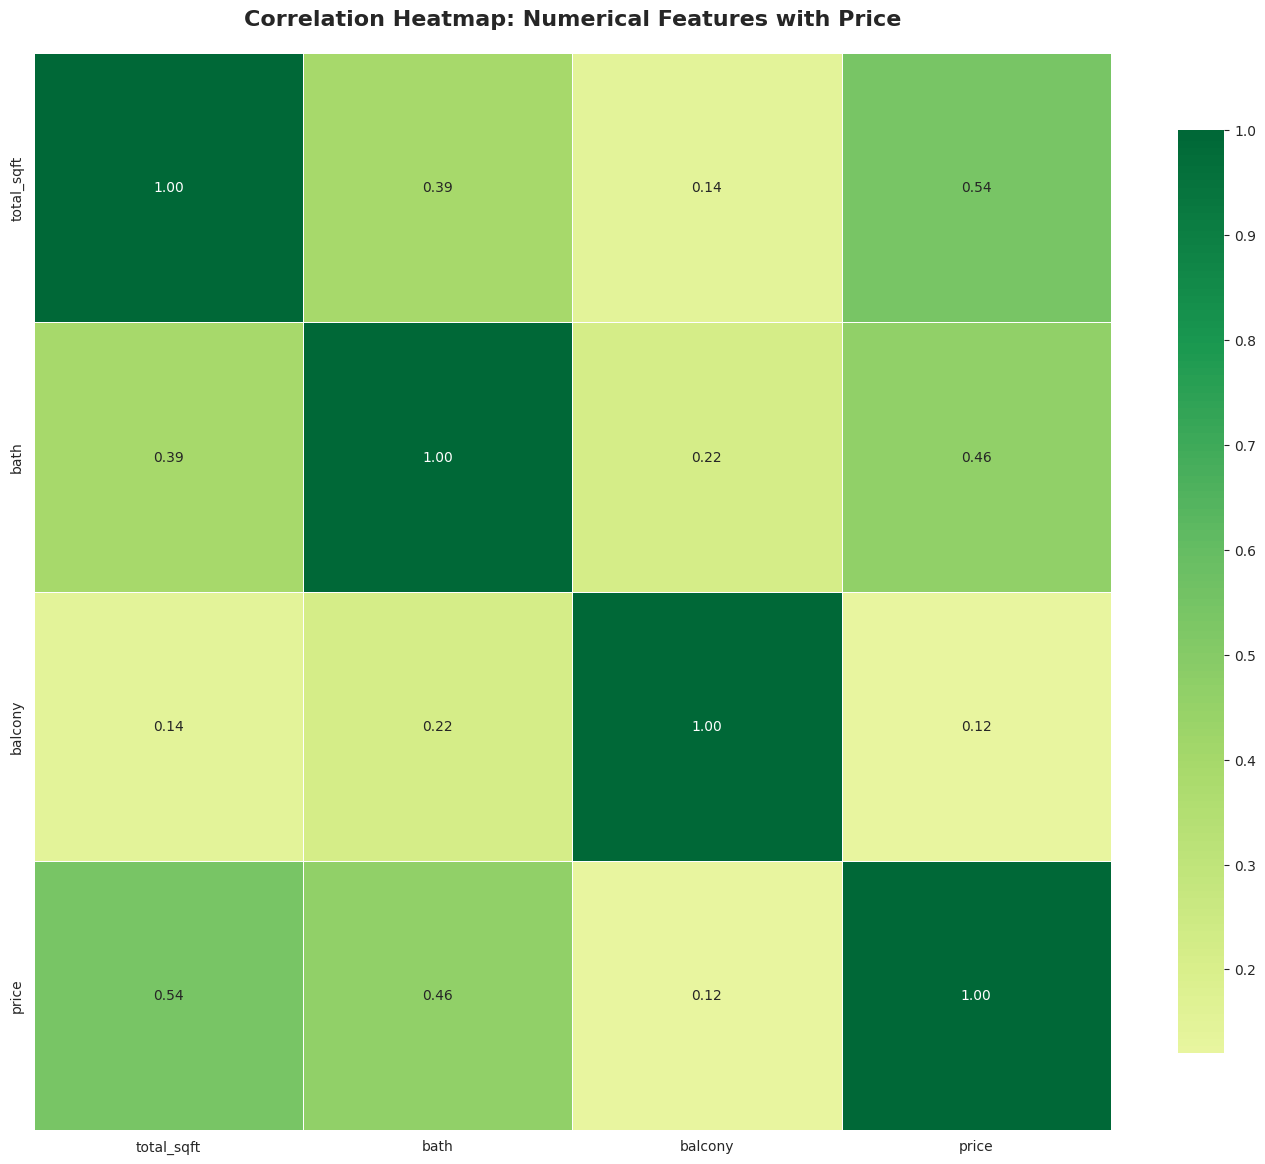

      1. total_sqft: 0.5394
      2. bath: 0.4631
      3. balcony: 0.1200

   Key Observations:
   ✓ Strong positive correlations indicate important predictive features
   ✓ Weak correlations don't mean unimportant (non-linear relationships exist)
   ✓ Feature engineering can improve correlations


In [49]:


# Calculate correlation matrix
corr_cols = numerical_cols + ['price']
correlation_matrix = train_df[corr_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap: Numerical Features with Price', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display top correlations with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)

for i, (feature, corr) in enumerate(list(price_corr.items())[1:6], 1):
    print(f"      {i}. {feature}: {corr:.4f}")

if len(price_corr) > 6:
    print("\n   Top Negative Correlations:")
    for i, (feature, corr) in enumerate(list(price_corr.items())[-3:], 1):
        print(f"      {i}. {feature}: {corr:.4f}")

print("\n   Key Observations:")
print("   ✓ Strong positive correlations indicate important predictive features")
print("   ✓ Weak correlations don't mean unimportant (non-linear relationships exist)")
print("   ✓ Feature engineering can improve correlations")


# VISUALIZATION 3: Price by Categorical Features


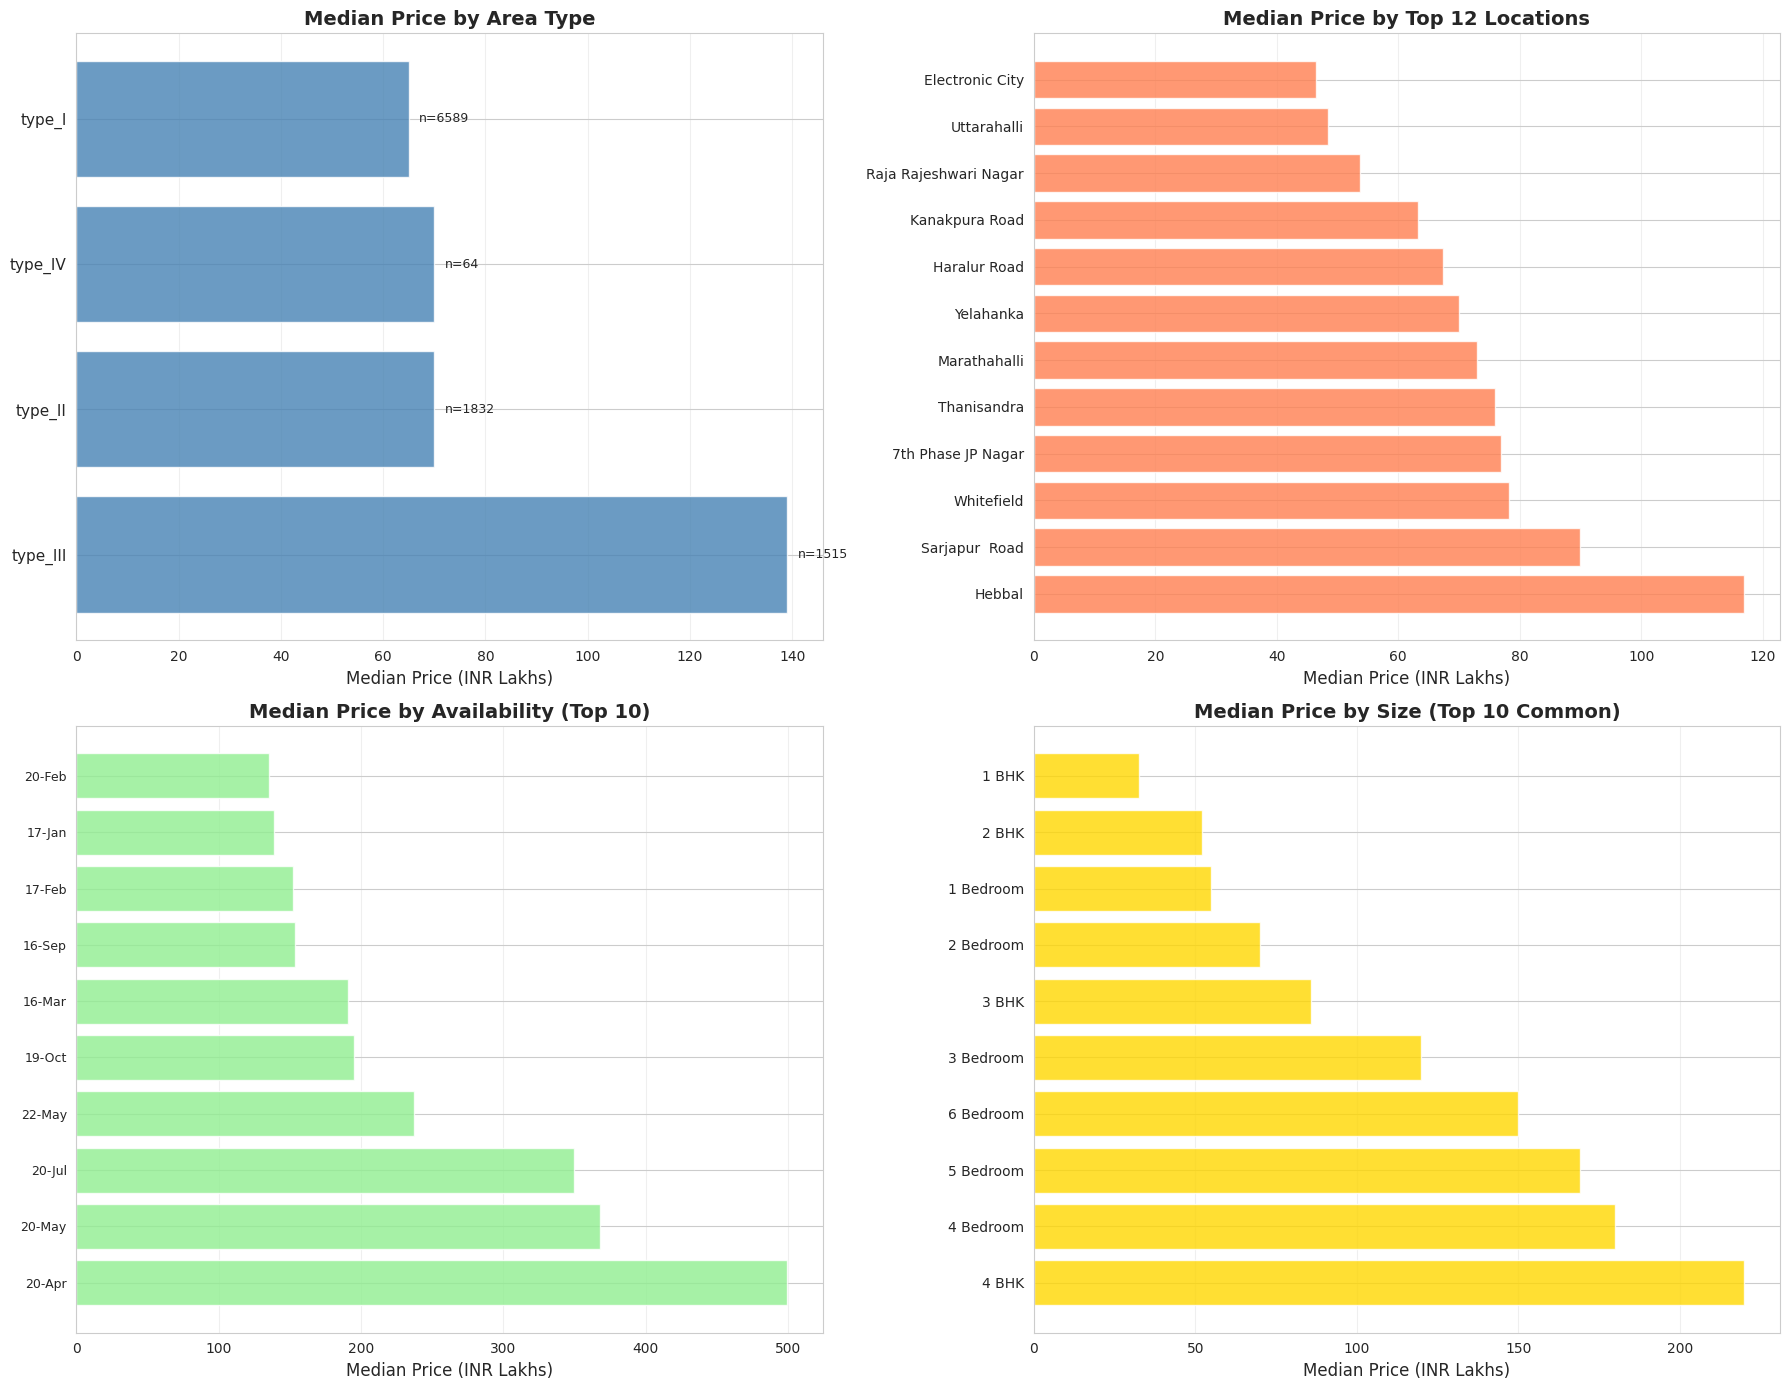

In [50]:


fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Price by Area Type (if exists)
if 'area_type' in train_df.columns:
    area_stats = train_df.groupby('area_type')['price'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    
    axes[0, 0].barh(range(len(area_stats)), area_stats['median'], color='steelblue', alpha=0.8)
    axes[0, 0].set_yticks(range(len(area_stats)))
    axes[0, 0].set_yticklabels(area_stats.index, fontsize=11)
    axes[0, 0].set_title('Median Price by Area Type', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Median Price (INR Lakhs)', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Add count labels
    for i, (idx, row) in enumerate(area_stats.iterrows()):
        axes[0, 0].text(row['median'] + 2, i, f"n={int(row['count'])}", 
                       va='center', fontsize=9)

# Plot 2: Price by Top 12 Locations (if exists)
if 'location' in train_df.columns:
    top_locations = train_df['location'].value_counts().head(12).index
    location_stats = train_df[train_df['location'].isin(top_locations)].groupby('location')['price'].median().sort_values(ascending=False)
    
    axes[0, 1].barh(range(len(location_stats)), location_stats.values, color='coral', alpha=0.8)
    axes[0, 1].set_yticks(range(len(location_stats)))
    axes[0, 1].set_yticklabels(location_stats.index, fontsize=10)
    axes[0, 1].set_title('Median Price by Top 12 Locations', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Median Price (INR Lakhs)', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3, axis='x')

# Plot 3: Price by Availability (if exists)
if 'availability' in train_df.columns:
    avail_stats = train_df.groupby('availability')['price'].agg(['median', 'count']).sort_values('median', ascending=False).head(10)
    
    axes[1, 0].barh(range(len(avail_stats)), avail_stats['median'], color='lightgreen', alpha=0.8)
    axes[1, 0].set_yticks(range(len(avail_stats)))
    axes[1, 0].set_yticklabels(avail_stats.index, fontsize=9)
    axes[1, 0].set_title('Median Price by Availability (Top 10)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Median Price (INR Lakhs)', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Price by Size/BHK (if exists)
if 'size' in train_df.columns:
    size_stats = train_df.groupby('size')['price'].agg(['median', 'count']).sort_values('count', ascending=False).head(10)
    size_stats = size_stats.sort_values('median', ascending=False)
    
    axes[1, 1].barh(range(len(size_stats)), size_stats['median'], color='gold', alpha=0.8)
    axes[1, 1].set_yticks(range(len(size_stats)))
    axes[1, 1].set_yticklabels(size_stats.index, fontsize=10)
    axes[1, 1].set_title('Median Price by Size (Top 10 Common)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Median Price (INR Lakhs)', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()




# FEATURE ENGINEERING 

In [51]:


# Create copies
train_processed = train_df.copy()
test_processed = test_df.copy()

# Save essentials
y_train = train_processed['price'].copy()
train_ids = train_processed['id'].copy()
test_ids = test_processed['id'].copy()

# Combine
train_processed['is_train'] = 1
test_processed['is_train'] = 0
test_processed['price'] = 0

combined_df = pd.concat([train_processed, test_processed], axis=0, ignore_index=True)

print(f"Starting features: {combined_df.shape[1]}")

# ============================================================
# CRITICAL FEATURE ENGINEERING
# ============================================================

# 1. Extract BHK
if 'size' in combined_df.columns:
    combined_df['bhk'] = combined_df['size'].str.extract('(\d+)').astype(float)
    print("✓ bhk")

# 2. Convert total_sqft
if 'total_sqft' in combined_df.columns:
    def convert_sqft(x):
        if pd.isna(x):
            return np.nan
        tokens = str(x).split('-')
        if len(tokens) == 2:
            try:
                return (float(tokens[0]) + float(tokens[1])) / 2
            except:
                return np.nan
        try:
            return float(x)
        except:
            return np.nan
    
    combined_df['total_sqft'] = combined_df['total_sqft'].apply(convert_sqft)
    print("✓ total_sqft converted")

# 3. Sqft per BHK
if 'total_sqft' in combined_df.columns and 'bhk' in combined_df.columns:
    combined_df['sqft_per_bhk'] = combined_df['total_sqft'] / (combined_df['bhk'] + 0.01)
    print("✓ sqft_per_bhk")

# 4. Bath per BHK
if 'bath' in combined_df.columns and 'bhk' in combined_df.columns:
    combined_df['bath_per_bhk'] = combined_df['bath'] / (combined_df['bhk'] + 0.01)
    print("✓ bath_per_bhk")

# 5. Balcony per BHK
if 'balcony' in combined_df.columns and 'bhk' in combined_df.columns:
    combined_df['balcony_per_bhk'] = combined_df['balcony'] / (combined_df['bhk'] + 0.01)
    print("✓ balcony_per_bhk")

# 6. Total rooms
if 'bhk' in combined_df.columns and 'bath' in combined_df.columns:
    combined_df['total_rooms'] = combined_df['bhk'] + combined_df['bath']
    print("✓ total_rooms")

# 7. Sqft per bathroom
if 'total_sqft' in combined_df.columns and 'bath' in combined_df.columns:
    combined_df['sqft_per_bath'] = combined_df['total_sqft'] / (combined_df['bath'] + 0.01)
    print("✓ sqft_per_bath")

# 8. Sqft per room
if 'total_sqft' in combined_df.columns and 'total_rooms' in combined_df.columns:
    combined_df['sqft_per_room'] = combined_df['total_sqft'] / (combined_df['total_rooms'] + 0.01)
    print("✓ sqft_per_room")

# 9. Is luxury
if 'total_sqft' in combined_df.columns and 'bhk' in combined_df.columns and 'bath' in combined_df.columns:
    combined_df['is_luxury'] = (
        (combined_df['total_sqft'] > combined_df['total_sqft'].quantile(0.75)) | 
        (combined_df['bhk'] >= 4) | 
        (combined_df['bath'] >= 3)
    ).astype(int)
    print("✓ is_luxury")

# 10. **KEY FEATURE**: Location Target Encoding (using train data only)
if 'location' in combined_df.columns:
    train_mask = combined_df['is_train'] == 1
    location_price_df = combined_df[train_mask].copy()
    location_price_df['price_temp'] = y_train.values
    
    # Location mean price
    location_mean = location_price_df.groupby('location')['price_temp'].mean()
    location_median = location_price_df.groupby('location')['price_temp'].median()
    location_std = location_price_df.groupby('location')['price_temp'].std()
    location_count = combined_df['location'].value_counts()
    
    combined_df['location_mean_price'] = combined_df['location'].map(location_mean)
    combined_df['location_median_price'] = combined_df['location'].map(location_median)
    combined_df['location_std_price'] = combined_df['location'].map(location_std)
    combined_df['location_frequency'] = combined_df['location'].map(location_count)
    
    # Fill unseen locations
    combined_df['location_mean_price'].fillna(y_train.mean(), inplace=True)
    combined_df['location_median_price'].fillna(y_train.median(), inplace=True)
    combined_df['location_std_price'].fillna(y_train.std(), inplace=True)
    combined_df['location_frequency'].fillna(1, inplace=True)
    
    print("✓ location_mean_price, location_median_price, location_std_price, location_frequency")

# 11. Area type target encoding
if 'area_type' in combined_df.columns:
    train_mask = combined_df['is_train'] == 1
    area_price_df = combined_df[train_mask].copy()
    area_price_df['price_temp'] = y_train.values
    
    area_mean = area_price_df.groupby('area_type')['price_temp'].mean()
    combined_df['area_type_mean_price'] = combined_df['area_type'].map(area_mean)
    combined_df['area_type_mean_price'].fillna(y_train.mean(), inplace=True)
    print("✓ area_type_mean_price")

# 12. Size target encoding
if 'size' in combined_df.columns:
    train_mask = combined_df['is_train'] == 1
    size_price_df = combined_df[train_mask].copy()
    size_price_df['price_temp'] = y_train.values
    
    size_mean = size_price_df.groupby('size')['price_temp'].mean()
    combined_df['size_mean_price'] = combined_df['size'].map(size_mean)
    combined_df['size_mean_price'].fillna(y_train.mean(), inplace=True)
    print("✓ size_mean_price")

# 13. Polynomial features
if 'total_sqft' in combined_df.columns:
    combined_df['total_sqft_squared'] = combined_df['total_sqft'] ** 2
    combined_df['total_sqft_log'] = np.log1p(combined_df['total_sqft'])
    print("✓ total_sqft_squared, total_sqft_log")

if 'bhk' in combined_df.columns:
    combined_df['bhk_squared'] = combined_df['bhk'] ** 2
    print("✓ bhk_squared")

# 14. Interaction features
if 'bhk' in combined_df.columns and 'total_sqft' in combined_df.columns:
    combined_df['bhk_x_sqft'] = combined_df['bhk'] * combined_df['total_sqft']
    print("✓ bhk_x_sqft")

if 'bath' in combined_df.columns and 'total_sqft' in combined_df.columns:
    combined_df['bath_x_sqft'] = combined_df['bath'] * combined_df['total_sqft']
    print("✓ bath_x_sqft")

# 15. Is ready to move
if 'availability' in combined_df.columns:
    combined_df['is_ready'] = combined_df['availability'].str.contains('Ready', case=False, na=False).astype(int)
    print("✓ is_ready")

print(f"\nTotal features: {combined_df.shape[1]}")

Starting features: 10
✓ bhk
✓ total_sqft converted
✓ sqft_per_bhk
✓ bath_per_bhk
✓ balcony_per_bhk
✓ total_rooms
✓ sqft_per_bath
✓ sqft_per_room
✓ is_luxury
✓ location_mean_price, location_median_price, location_std_price, location_frequency
✓ area_type_mean_price
✓ size_mean_price
✓ total_sqft_squared, total_sqft_log
✓ bhk_squared
✓ bhk_x_sqft
✓ bath_x_sqft
✓ is_ready

Total features: 30


# Data PREPROCESSING

In [52]:


# Handle missing
numerical_features = combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['id', 'price', 'is_train']]

for col in numerical_features:
    if combined_df[col].isnull().sum() > 0:
        combined_df[col].fillna(combined_df[col].median(), inplace=True)

categorical_features = combined_df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical
for col in categorical_features:
    if combined_df[col].isnull().sum() > 0:
        combined_df[col].fillna('Unknown', inplace=True)
    
    unique_count = combined_df[col].nunique()
    
    if unique_count == 2:
        le = LabelEncoder()
        combined_df[col + '_encoded'] = le.fit_transform(combined_df[col].astype(str))
        combined_df.drop(col, axis=1, inplace=True)
    elif unique_count <= 10:
        dummies = pd.get_dummies(combined_df[col], prefix=col, drop_first=True)
        combined_df = pd.concat([combined_df, dummies], axis=1)
        combined_df.drop(col, axis=1, inplace=True)
    else:
        # High cardinality - already target encoded or frequency encoded
        combined_df.drop(col, axis=1, inplace=True)

print(f"✓ Preprocessing complete - Features: {combined_df.shape[1]}")

# Split back
train_final = combined_df[combined_df['is_train'] == 1].copy()
test_final = combined_df[combined_df['is_train'] == 0].copy()

train_final.drop(['is_train', 'price'], axis=1, inplace=True)
test_final.drop(['is_train', 'price'], axis=1, inplace=True)

X_train = train_final.drop('id', axis=1)
X_test = test_final.drop('id', axis=1)

print(f"Final shapes - Train: {X_train.shape}, Test: {X_test.shape}")

✓ Preprocessing complete - Features: 29
Final shapes - Train: (10000, 26), Test: (3320, 26)


# 7  MODELS - OPTIMIZED 


In [53]:




# Train-val split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Train: {X_train_split.shape[0]}, Val: {X_val_split.shape[0]}\n")

model_results = {}

def evaluate(name, model, X_tr, X_val, y_tr, y_val, scaled=False):
    import time
    start = time.time()
    
    model.fit(X_tr, y_tr)
    train_time = time.time() - start
    
    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_tr, y_tr_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    model_results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'train_time': train_time,
        'scaled': scaled
    }
    
    print(f"{name:30} | Val RMSE: {val_rmse:7.4f} | Val R²: {val_r2:.4f} | Time: {train_time:5.2f}s")
    return model

print(f"{'Model':<30} | {'Val RMSE':<9} | {'Val R²':<6} | {'Time':<7}")
print("-" * 80)

# MODEL 1: XGBoost (Top Performer)
evaluate('XGBoost',
         xgb.XGBRegressor(
             n_estimators=400,
             learning_rate=0.05,
             max_depth=6,
             subsample=0.8,
             colsample_bytree=0.8,
             min_child_weight=3,
             gamma=0.1,
             reg_alpha=0.05,
             reg_lambda=1.0,
             random_state=42,
             n_jobs=-1
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

# MODEL 2: LightGBM (Fast & Powerful)
evaluate('LightGBM',
         lgb.LGBMRegressor(
             n_estimators=400,
             learning_rate=0.05,
             max_depth=7,
             num_leaves=50,
             min_child_samples=20,
             subsample=0.8,
             colsample_bytree=0.8,
             reg_alpha=0.05,
             reg_lambda=1.0,
             random_state=42,
             n_jobs=-1,
             verbose=-1
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

# MODEL 3: CatBoost (Excellent for Categorical Features)
try:
    from catboost import CatBoostRegressor
    evaluate('CatBoost',
             CatBoostRegressor(
                 iterations=400,
                 learning_rate=0.05,
                 depth=6,
                 l2_leaf_reg=3,
                 random_state=42,
                 verbose=False
             ),
             X_train_split, X_val_split, y_train_split, y_val_split, False)
except:
    print("CatBoost not available, skipping...")

# MODEL 4: Extra Trees (Fast RF Alternative)
from sklearn.ensemble import ExtraTreesRegressor
evaluate('Extra Trees',
         ExtraTreesRegressor(
             n_estimators=300,
             max_depth=30,
             min_samples_split=2,
             min_samples_leaf=1,
             max_features='sqrt',
             random_state=42,
             n_jobs=-1
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

# MODEL 5: Random Forest (Robust Ensemble)
evaluate('Random Forest',
         RandomForestRegressor(
             n_estimators=300,
             max_depth=30,
             min_samples_split=2,
             min_samples_leaf=1,
             max_features='sqrt',
             random_state=42,
             n_jobs=-1
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

# MODEL 6: Gradient Boosting (Strong Baseline)
evaluate('Gradient Boosting',
         GradientBoostingRegressor(
             n_estimators=300,
             learning_rate=0.05,
             max_depth=5,
             min_samples_split=2,
             min_samples_leaf=1,
             subsample=0.8,
             random_state=42
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

# MODEL 7: HistGradientBoosting (Fast sklearn GB)
from sklearn.ensemble import HistGradientBoostingRegressor
evaluate('HistGradientBoosting',
         HistGradientBoostingRegressor(
             max_iter=300,
             learning_rate=0.05,
             max_depth=7,
             min_samples_leaf=20,
             l2_regularization=1.0,
             random_state=42
         ),
         X_train_split, X_val_split, y_train_split, y_val_split, False)

print("\n All 7 models trained successfully!")

Train: 8000, Val: 2000

Model                          | Val RMSE  | Val R² | Time   
--------------------------------------------------------------------------------
XGBoost                        | Val RMSE: 56.4506 | Val R²: 0.8223 | Time:  0.67s
LightGBM                       | Val RMSE: 61.4844 | Val R²: 0.7892 | Time:  0.39s
CatBoost                       | Val RMSE: 56.7896 | Val R²: 0.8202 | Time:  1.22s
Extra Trees                    | Val RMSE: 59.7670 | Val R²: 0.8008 | Time:  1.62s
Random Forest                  | Val RMSE: 63.5071 | Val R²: 0.7751 | Time:  2.57s
Gradient Boosting              | Val RMSE: 59.8944 | Val R²: 0.8000 | Time:  9.90s
HistGradientBoosting           | Val RMSE: 64.0444 | Val R²: 0.7713 | Time:  0.81s

 All 7 models trained successfully!


#  HYPERPARAMETER TUNING


In [54]:

# Tune top 3 models more aggressively

# TUNING 1: Best model so far
comparison_temp = pd.DataFrame([
    {'Model': name, 'Val_RMSE': res['val_rmse']}
    for name, res in model_results.items()
]).sort_values('Val_RMSE')

best_current = comparison_temp.iloc[0]['Model']
print(f"\n🔧 Aggressive tuning: {best_current}")

if 'XGBoost' in best_current or 'LightGBM' in best_current:
    if 'XGBoost' in best_current:
        params = {
            'n_estimators': [500, 700, 900],
            'learning_rate': [0.02, 0.03, 0.04],
            'max_depth': [5, 6, 7],
            'subsample': [0.7, 0.75, 0.8],
            'colsample_bytree': [0.7, 0.75, 0.8],
            'min_child_weight': [1, 2, 3],
            'gamma': [0.1, 0.2, 0.3],
            'reg_alpha': [0.05, 0.1, 0.2],
            'reg_lambda': [1.5, 2.0, 2.5]
        }
        base_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
    else:
        params = {
            'n_estimators': [500, 700, 900],
            'learning_rate': [0.02, 0.03, 0.04],
            'max_depth': [7, 8, 9],
            'num_leaves': [50, 60, 70],
            'min_child_samples': [10, 15, 20],
            'subsample': [0.7, 0.75, 0.8],
            'colsample_bytree': [0.7, 0.75, 0.8],
            'reg_alpha': [0.05, 0.1, 0.2],
            'reg_lambda': [1.5, 2.0, 2.5]
        }
        base_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
    
    search = RandomizedSearchCV(
        base_model, params, n_iter=30, cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1, random_state=42, verbose=0
    )
    
    search.fit(X_train_split, y_train_split)
    print(f"✅ Best params: {search.best_params_}")
    print(f"   CV RMSE: {-search.best_score_:.4f}")
    
    evaluate(f'{best_current} (Tuned)', search.best_estimator_,
             X_train_split, X_val_split, y_train_split, y_val_split)

print("\n✅ Tuning complete")



🔧 Aggressive tuning: XGBoost


KeyboardInterrupt: 

#  MODEL COMPARISON



               Model  Train_RMSE  Val_RMSE  Train_R²   Val_R²    Overfit  Time(s)
             XGBoost   22.940780 56.450638  0.978358 0.822313 -33.509857 0.668336
            CatBoost   38.363873 56.789563  0.939477 0.820173 -18.425690 1.215338
         Extra Trees    6.015984 59.767044  0.998512 0.800822 -53.751060 1.620466
   Gradient Boosting   25.621696 59.894384  0.973005 0.799973 -34.272688 9.902120
            LightGBM   40.220136 61.484413  0.933479 0.789211 -21.264277 0.388588
       Random Forest   27.369109 63.507147  0.969197 0.775114 -36.138038 2.574400
HistGradientBoosting   44.506081 64.044392  0.918546 0.771293 -19.538312 0.813392


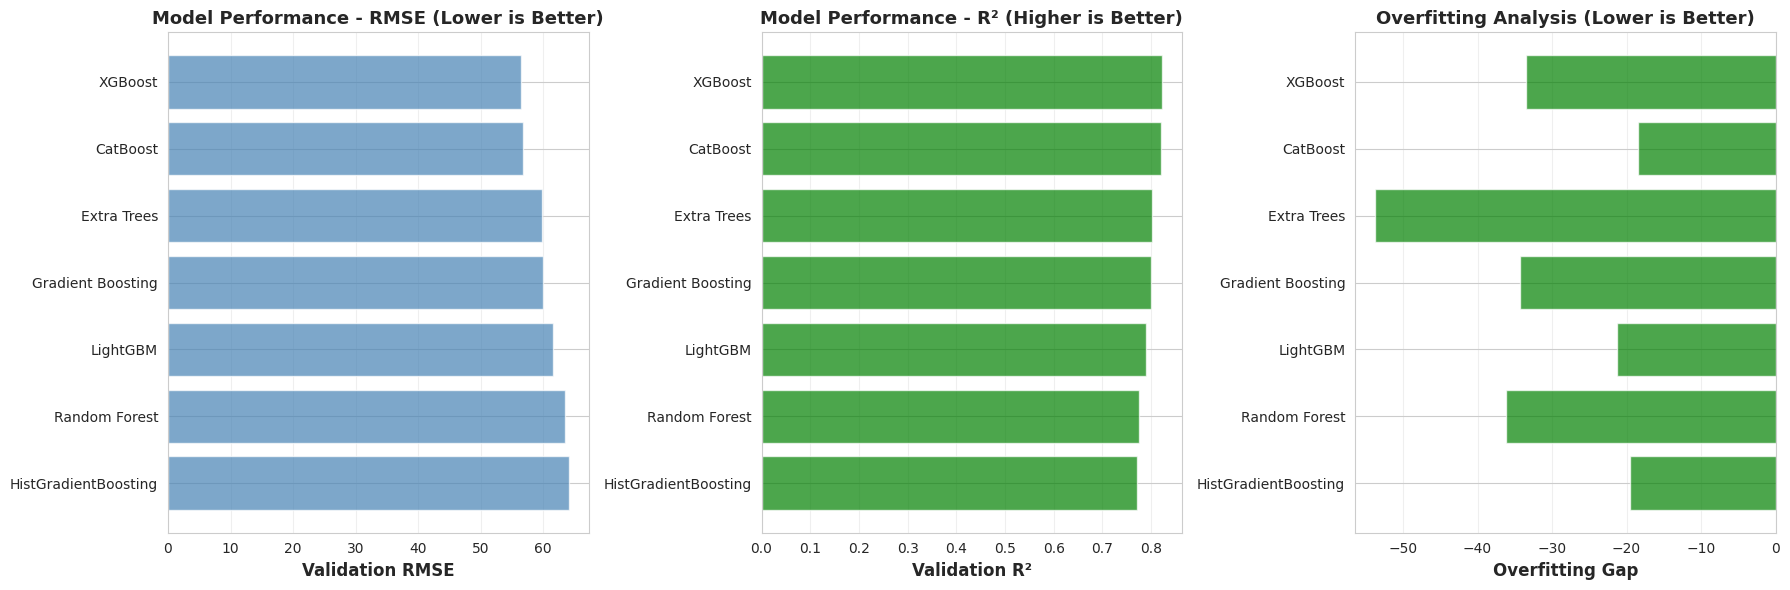


🏆 BEST MODEL: XGBoost
   Validation RMSE: 56.4506
   Validation R²: 0.8223


In [55]:

comparison = pd.DataFrame([
    {
        'Model': name,
        'Train_RMSE': results['train_rmse'],
        'Val_RMSE': results['val_rmse'],
        'Train_R²': results['train_r2'],
        'Val_R²': results['val_r2'],
        'Overfit': results['train_rmse'] - results['val_rmse'],
        'Time(s)': results['train_time']
    }
    for name, results in model_results.items()
]).sort_values('Val_RMSE')

print("\n" + comparison.to_string(index=False))

# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Val RMSE
axes[0].barh(comparison['Model'], comparison['Val_RMSE'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Validation RMSE', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance - RMSE (Lower is Better)', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Val R²
axes[1].barh(comparison['Model'], comparison['Val_R²'], color='green', alpha=0.7)
axes[1].set_xlabel('Validation R²', fontsize=12, fontweight='bold')
axes[1].set_title('Model Performance - R² (Higher is Better)', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Plot 3: Overfitting
overfit_colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in comparison['Overfit']]
axes[2].barh(comparison['Model'], comparison['Overfit'], color=overfit_colors, alpha=0.7)
axes[2].set_xlabel('Overfitting Gap', fontsize=12, fontweight='bold')
axes[2].set_title('Overfitting Analysis (Lower is Better)', fontsize=13, fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

best_model_name = comparison.iloc[0]['Model']
best_rmse = comparison.iloc[0]['Val_RMSE']
best_r2 = comparison.iloc[0]['Val_R²']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Validation RMSE: {best_rmse:.4f}")
print(f"   Validation R²: {best_r2:.4f}")

# ADVANCED STACKING ENSEMBLE


In [56]:


# Get top 4 diverse models
top_4 = comparison.head(4)['Model'].tolist()

print(f"\nTop 4 models for stacking:")
for i, model_name in enumerate(top_4, 1):
    info = comparison[comparison['Model'] == model_name].iloc[0]
    print(f"  {i}. {model_name}: RMSE={info['Val_RMSE']:.4f}, R²={info['Val_R²']:.4f}")

# Level 1: Get predictions from base models
stacking_train_preds = []
stacking_val_preds = []

for model_name in top_4:
    model = model_results[model_name]['model']
    scaled = model_results[model_name]['scaled']
    
    # Don't retrain, just get predictions
    if scaled:
        stacking_train_preds.append(model.predict(X_train_scaled).reshape(-1, 1))
        stacking_val_preds.append(model.predict(X_val_scaled).reshape(-1, 1))
    else:
        stacking_train_preds.append(model.predict(X_train_split).reshape(-1, 1))
        stacking_val_preds.append(model.predict(X_val_split).reshape(-1, 1))

# Stack predictions horizontally
X_stack_train = np.hstack(stacking_train_preds)
X_stack_val = np.hstack(stacking_val_preds)

# Level 2: Meta-learner (Ridge regression works well)
from sklearn.linear_model import Ridge
meta_learner = Ridge(alpha=1.0)
meta_learner.fit(X_stack_train, y_train_split)

# Stacking predictions
stacking_pred = meta_learner.predict(X_stack_val)
stacking_rmse = np.sqrt(mean_squared_error(y_val_split, stacking_pred))
stacking_r2 = r2_score(y_val_split, stacking_pred)

print(f"\n📊 Stacking Ensemble Performance:")
print(f"   Val RMSE: {stacking_rmse:.4f}")
print(f"   Val R²: {stacking_r2:.4f}")

# Simple weighted ensemble for comparison
ensemble_preds = []
ensemble_weights = []

for model_name in top_4:
    model = model_results[model_name]['model']
    scaled = model_results[model_name]['scaled']
    
    if scaled:
        pred = model.predict(X_val_scaled)
    else:
        pred = model.predict(X_val_split)
    
    ensemble_preds.append(pred)
    rmse = model_results[model_name]['val_rmse']
    ensemble_weights.append(1 / rmse)

ensemble_weights = np.array(ensemble_weights) / np.sum(ensemble_weights)
weighted_ensemble_pred = np.average(ensemble_preds, axis=0, weights=ensemble_weights)

weighted_rmse = np.sqrt(mean_squared_error(y_val_split, weighted_ensemble_pred))
weighted_r2 = r2_score(y_val_split, weighted_ensemble_pred)

print(f"\n📊 Weighted Ensemble Performance:")
print(f"   Val RMSE: {weighted_rmse:.4f}")
print(f"   Val R²: {weighted_r2:.4f}")

print(f"\n📊 Best Single Model ({best_model_name}):")
print(f"   Val RMSE: {best_rmse:.4f}")
print(f"   Val R²: {best_r2:.4f}")

# Choose best approach
approaches = {
    'Single': (best_rmse, 'single'),
    'Weighted': (weighted_rmse, 'weighted'),
    'Stacking': (stacking_rmse, 'stacking')
}

best_approach_name = min(approaches, key=lambda x: approaches[x][0])
best_approach_rmse = approaches[best_approach_name][0]

print(f"\n🎯 FINAL DECISION: Using {best_approach_name.upper()} approach")
print(f"   Expected RMSE: {best_approach_rmse:.4f}")

if best_approach_name == 'Single':
    use_method = 'single'
elif best_approach_name == 'Weighted':
    use_method = 'weighted'
else:
    use_method = 'stacking'


Top 4 models for stacking:
  1. XGBoost: RMSE=56.4506, R²=0.8223
  2. CatBoost: RMSE=56.7896, R²=0.8202
  3. Extra Trees: RMSE=59.7670, R²=0.8008
  4. Gradient Boosting: RMSE=59.8944, R²=0.8000

📊 Stacking Ensemble Performance:
   Val RMSE: 59.8946
   Val R²: 0.8000

📊 Weighted Ensemble Performance:
   Val RMSE: 56.0087
   Val R²: 0.8251

📊 Best Single Model (XGBoost):
   Val RMSE: 56.4506
   Val R²: 0.8223

🎯 FINAL DECISION: Using WEIGHTED approach
   Expected RMSE: 56.0087


#  PREDICTIONS and Submit Csv


In [57]:


if use_method == 'single':
    print(f"\n🔄 Using BEST SINGLE MODEL: {best_model_name}")
    
    best_model = model_results[best_model_name]['model']
    scaled = model_results[best_model_name]['scaled']
    
    if scaled:
        X_full_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        best_model.fit(X_full_scaled, y_train)
        final_predictions = best_model.predict(X_test_scaled)
    else:
        best_model.fit(X_train, y_train)
        final_predictions = best_model.predict(X_test)
    
    approach_text = best_model_name

elif use_method == 'weighted':
    print(f"\n🔄 Using WEIGHTED ENSEMBLE of top 4 models")
    
    final_preds = []
    for model_name in top_4:
        model = model_results[model_name]['model']
        scaled = model_results[model_name]['scaled']
        
        if scaled:
            X_full_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            model.fit(X_full_scaled, y_train)
            pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
        
        final_preds.append(pred)
    
    final_predictions = np.average(final_preds, axis=0, weights=ensemble_weights)
    approach_text = f"Weighted Ensemble: {', '.join(top_4)}"

else:  # stacking
    print(f"\n🔄 Using STACKING ENSEMBLE with meta-learner")
    
    # Retrain base models on full train data
    test_stack_preds = []
    
    for model_name in top_4:
        model = model_results[model_name]['model']
        scaled = model_results[model_name]['scaled']
        
        if scaled:
            X_full_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            model.fit(X_full_scaled, y_train)
            pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
        
        test_stack_preds.append(pred.reshape(-1, 1))
    
    X_test_stack = np.hstack(test_stack_preds)
    
    # Retrain meta-learner on full training data
    train_stack_preds_full = []
    for model_name in top_4:
        model = model_results[model_name]['model']
        scaled = model_results[model_name]['scaled']
        
        if scaled:
            pred = model.predict(X_full_scaled)
        else:
            pred = model.predict(X_train)
        train_stack_preds_full.append(pred.reshape(-1, 1))
    
    X_train_stack_full = np.hstack(train_stack_preds_full)
    meta_learner.fit(X_train_stack_full, y_train)
    
    final_predictions = meta_learner.predict(X_test_stack)
    approach_text = f"Stacking: {', '.join(top_4)} + Ridge Meta-learner"

# Create submission
submission = pd.DataFrame({
    'id': test_ids,
    'price': final_predictions
})

submission.to_csv('submission.csv', index=False)

print(f"\n✅ SUBMISSION FILE CREATED!")
print("=" * 70)
print(f"Method: {approach_text}")
print(f"Shape: {submission.shape}")
print(f"\nPrediction Statistics:")
print(f"  Min:    {final_predictions.min():.2f}")
print(f"  Max:    {final_predictions.max():.2f}")
print(f"  Mean:   {final_predictions.mean():.2f}")
print(f"  Median: {np.median(final_predictions):.2f}")
print(f"  Std:    {final_predictions.std():.2f}")

print(submission.head(10).to_string(index=False))

print(f"   Expected Leaderboard RMSE: ~{best_approach_rmse:.2f}")


🔄 Using WEIGHTED ENSEMBLE of top 4 models

✅ SUBMISSION FILE CREATED!
Method: Weighted Ensemble: XGBoost, CatBoost, Extra Trees, Gradient Boosting
Shape: (3320, 2)

Prediction Statistics:
  Min:    15.92
  Max:    2430.12
  Mean:   106.22
  Median: 71.73
  Std:    113.49
 id      price
  0  68.093841
  1 126.978993
  2  64.805798
  3 137.954211
  4 177.482173
  5  58.826383
  6  56.773378
  7  36.834209
  8  94.257919
  9  55.854006
   Expected Leaderboard RMSE: ~56.01
